# Basic image analysis using gpt-vision

In [ ]:
from google.colab import drive
import os

mount='/content/gdrive'
drive.mount(mount)

# Switch to the directory on the Google Drive that you want to use
drive_root = mount + "/My Drive/large-language-models-main"
%cd $drive_root

In [3]:
from openai import OpenAI

import matplotlib.pyplot as plt

In [4]:
prompt = """
Tell a one paragraph dramatic story for a picture that I show you, including:

- What has led up to the event shown
- What is happening in the scene
- The thoughts and feelings of characters
- The outcome of the story

Your description should be close to real speech, including any fillers. Pretend that you are talking to me."""

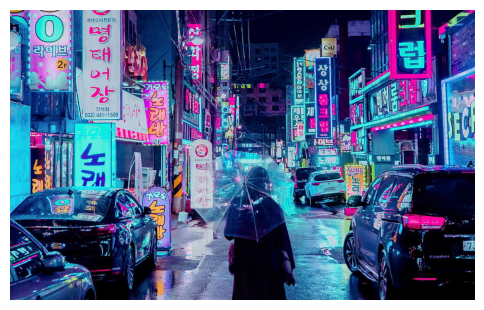

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(plt.imread('../images/new_images/image_1.jpg'))
ax.axis('off')
plt.show()

In [7]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "../images/new_images/image_1.jpg"
base64_image = encode_image(image_path)

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
      {
        "role": "user",
        "content": [
          {"type": "text", "text": prompt},
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/png;base64,{base64_image}",
            },
          },
        ],
      }
    ],
    max_tokens=256,
  )

In [8]:
print(response.choices[0].message.content)

Alright, so imagine this: There's a small, bustling city where the neon lights never dim, even under the relentless drizzle that's been going on for hours now. Just before this moment, there was a sharp-eyed detective named Soo-min who was tailing a shadowy figure through these rain-slicked streets, right? It's all part of a big case involving corporate espionage, and this figure, veiled by a clear umbrella, is the key to cracking the whole conspiracy wide open.

And now, in this scene, you've got Soo-min cautiously following at a distance, using the vibrant neon signs as camouflage. The reflection of the lights dances on the wet pavement, creating an almost dreamlike atmosphere. Amidst the hum of the city, Soo-min's heart is racing, his mind swirling with thoughts of finally getting the evidence he needs, while also combating this gnawing suspicion that he might be walking right into a trap.

The figure under the umbrella pauses, then turns suddenly, causing Soo-min to freeze. Their e

## Being systematic

This is great, but suppose we want to run many of these, perhaps using different prompts?

In [21]:
import sys  
import os
sys.path.append("../large-language-models/")

In [22]:
from agents.vision_agent import VisionAgent

In [19]:
agent = VisionAgent()
image = "../images/new_images/image_1.jpg"

# load prompt from file
with open("../prompts/normal_prompt.txt", "r") as f:
    prompt = f.read()

response = agent.get_response(prompt, image)

In [20]:
print(response)

Alright, so, imagine this—the picture you're showing me, it's got a heavy Blade Runner vibe, doesn't it? It's like, we've been following the story of this character—an enigmatic figure dressed in a dark coat, walking down an alley bathed in neon lights under the steady drizzle of a rainy night. They've been on a long journey, you know, searching for someone or something in this sprawling cyberpunk-esque city. The neon signs are like a kaleidoscope of lost messages, and our character feels both drawn and repelled by their glow. There's a sense of determination mingled with a tinge of despair in their posture, as if the very essence of the city is weighing them down. 

Now, this scene unfolding before us, it's not just about the wet pavement reflecting all those vivid colors or the sound of the rain playing its rhythmic tune on the umbrellas. It's like, the character is really grappling with their thoughts, wrestling with a sense of isolation amid the urban sprawl. Maybe they’re on the v